# Analysis for credit card defaulter


**Instructions**  

Prepare a Python notebook to build, train and evaluate models on the given datasets. Please read the instructions carefully. 

Business Case: Build a classifier model to predict the credit card defaulter for given dataset  

**Import Libraries/Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df=pd.read_csv("credit_card_defaulter.csv")
df

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.37891
9996,9997,No,No,757.962918,19660.72177
9997,9998,No,No,845.411989,58636.15698
9998,9999,No,No,1569.009053,36669.11236


# Data understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [4]:
##checking the null values
df.isna().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

**There is no null value in dataset**

In [5]:
# Obtain the description of the dataframe
df.drop('Unnamed: 0', axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
balance,10000.0,835.374886,483.714985,0.000000,481.731105,823.636973,1166.308387,2654.322576
income,10000.0,33516.981876,13336.639563,771.967729,21340.462905,34552.644800,43807.729275,73554.233500


In [6]:
#let us see which columns have numeric featrue
num_col=df.select_dtypes(include=[np.number])
num_col.columns

Index(['Unnamed: 0', 'balance', 'income'], dtype='object')

In [7]:
# categorical varible
cate_col=df.select_dtypes(include=[np.object])
cate_col.columns

Index(['default', 'student'], dtype='object')

In [8]:
#checking the categorical features
df['default'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['student'].unique()

array(['No', 'Yes'], dtype=object)

# Exploratory data analysis

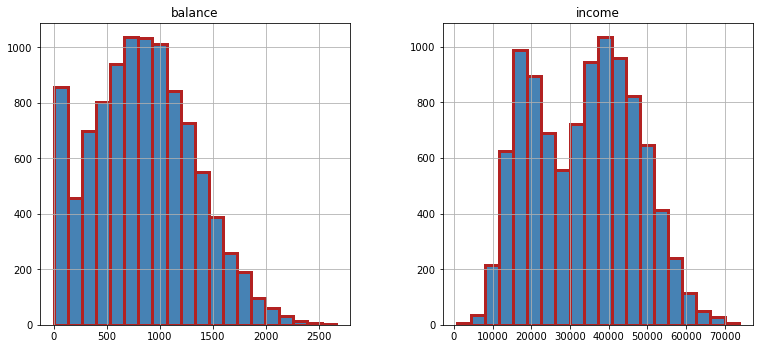

In [10]:
# Histogram for each continuous variable

num_col.drop('Unnamed: 0', axis=1).hist(figsize=(20, 20), bins=20, layout=(3, 3), color='steelblue',
                                   edgecolor='firebrick', linewidth=3);

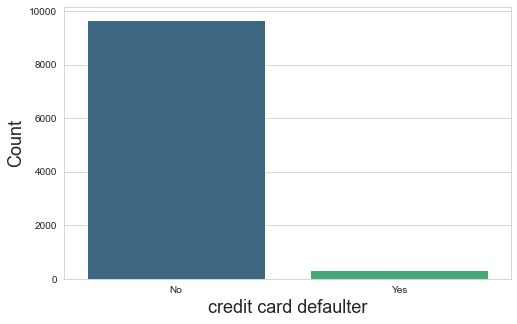

In [18]:
# Countplot for the feature 'diagnosis' 

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='default', data=df, palette='viridis')
plt.ylabel('Count', fontsize = 18)
plt.xlabel('credit card defaulter', fontsize = 18);

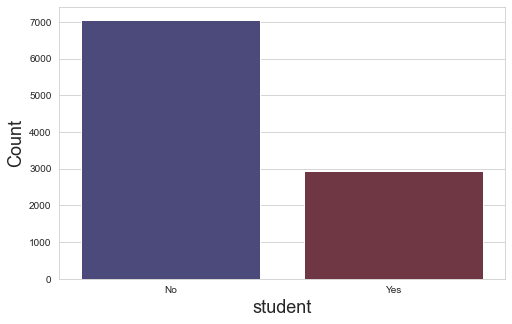

In [19]:
# Countplot for the feature 'diagnosis' 

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='student', data=df, palette='icefire')
plt.ylabel('Count', fontsize = 18)
plt.xlabel('student', fontsize = 18);

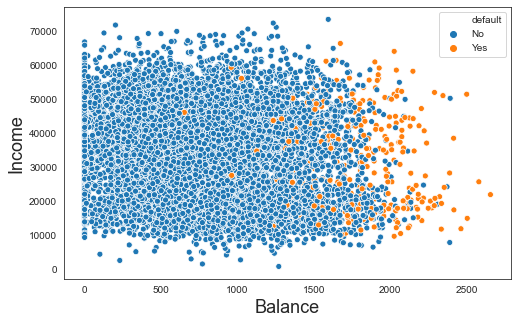

In [20]:
# Scatter plot between balance and income using defult as hue

plt.figure(figsize=(8,5))
sns.set_style('white')
sns.scatterplot(x='balance', y='income', data=df, hue='default')
plt.ylabel('Income', fontsize = 18)
plt.xlabel('Balance', fontsize = 18);

**See here there is zero correlation** 

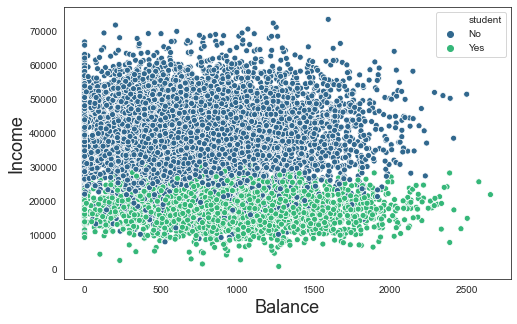

In [21]:
# Scatter plot between balance and income using student as hue

plt.figure(figsize=(8,5))
sns.set_style('white')
sns.scatterplot(x='balance', y='income', data=df, hue='student', palette='viridis')
plt.ylabel('Income', fontsize = 18)
plt.xlabel('Balance', fontsize = 18);

In [18]:
df[(df['income']<20000) & (df['balance']<2000)]

,Unnamed: 0,default,student,balance,income
1,2,No,Yes,817.180407,12106.134700
5,6,No,Yes,919.588530,7491.558572
7,8,No,Yes,808.667504,17600.451340
11,12,No,Yes,1220.583753,13268.562220
17,18,No,Yes,527.540184,17636.539620
...,...,...,...,...,...
9980,9981,No,Yes,770.015741,13684.789950
9986,9987,No,Yes,401.332673,15332.017830
9994,9995,No,Yes,172.412988,14955.941690
9996,9997,No,No,757.962918,19660.721770


In [19]:
df.corr()

,Unnamed: 0,balance,income
Unnamed: 0,1.000000,0.010342,-0.001427
balance,0.010342,1.000000,-0.152243
income,-0.001427,-0.152243,1.000000


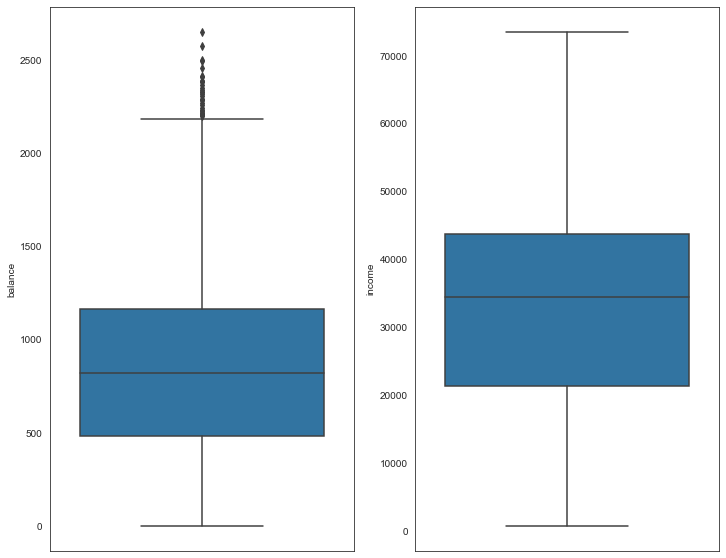

In [22]:
#Boxplot to check the presence of outliers
fig, axes = plt.subplots(1, 2, figsize = (12, 10))
sns.boxplot(data = num_col, y = 'balance', ax = axes[0])
sns.boxplot(data = num_col, y = 'income', ax = axes[1]);

        In the column balance there is a outlier there,so we have to perform the inter quartile range score 

In [67]:
#Oultier detection with Inter-Quartile range score
cols = ['balance'] 

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df_new1 = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new1.info()

(9969, 5)

In [101]:
#basically it was series we can index the data
Q3[0]

1166.30838675

In [91]:
Q1[0]

481.73110505

In [99]:
#checking outlier removed data
print(df[df['balance']>(Q3 + 1.5 * IQR)[0]])
print('\n')
print(df[df['balance']<(Q1 - 1.5 * IQR)[0]])

      Unnamed: 0 default student      balance        income
173          174     Yes     Yes  2205.799521  14271.492250
1136        1137     Yes      No  2499.016750  51504.293960
1160        1161     Yes     Yes  2502.684931  14947.519750
1359        1360     Yes      No  2220.966201  40725.096210
1502        1503     Yes     Yes  2332.878254  11770.234120
1609        1610     Yes     Yes  2269.946966  18021.105950
2096        2097     Yes     Yes  2261.848162  20030.165120
2140        2141      No     Yes  2308.893236  19110.266410
2929        2930     Yes     Yes  2387.314867  28296.914720
3162        3163     Yes     Yes  2415.316994  17429.503370
3189        3190     Yes      No  2228.472283  27438.348990
3702        3703      No     Yes  2370.463612  24251.958720
3855        3856     Yes     Yes  2321.882221  21331.314780
3913        3914     Yes     Yes  2334.123559  19335.889290
3976        3977      No     Yes  2388.174009   7832.135644
4060        4061     Yes     Yes  2216.0

In [95]:
df[df['balance']<(Q1 - 1.5 * IQR)[0]]

,Unnamed: 0,default,student,balance,income


In [ ]:
print(ds[ds['balance'] > upper_limit])
print('\n')
print(ds[ds['balance'] < lower_limit]

**After performing inter quartil range score it wae reduce the 9969**

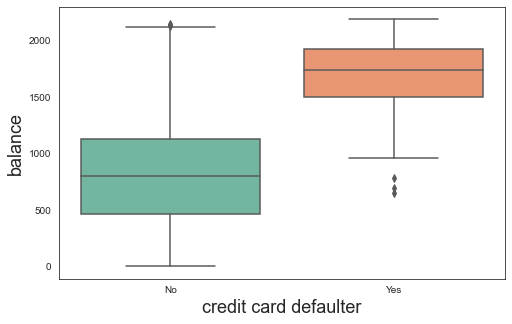

In [140]:
#checking for box plot for credit card defaulter and  balance
plt.figure(figsize=(8,5))
sns.set_style('white')
sns.boxplot(x='default',y='balance',data=df_new1, palette="Set2")
plt.ylabel('balance', fontsize = 18)
plt.xlabel('credit card defaulter', fontsize = 18);

# Preparing the data 

In [8]:
#Removing the Unnamed: 0 from dataset
df_new1.drop(["Unnamed: 0"], axis=1, inplace=True)

df_new1.head()

C:\Users\2211575\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [9]:
# splitting the data into x and y
x = df_new1.iloc[:,1:].values
y = df_new1.iloc[:,0].values

print(x)

[['No' 729.5264952 44361.62507]
 ['Yes' 817.1804066000001 12106.1347]
 ['No' 1073.549164 31767.13895]
 ...
 ['No' 845.4119892000001 58636.15697999999]
 ['No' 1569.009053 36669.11236]
 ['Yes' 200.92218259999999 16862.95232]]


# Encoding the catgorical data

**Encoding the Independent Variable**

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
var = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(var.fit_transform(x))

In [11]:
print([x])

[array([[1.0, 0.0, 729.5264952, 44361.62507],
       [0.0, 1.0, 817.1804066000001, 12106.1347],
       [1.0, 0.0, 1073.549164, 31767.13895],
       ...,
       [1.0, 0.0, 845.4119892000001, 58636.15697999999],
       [1.0, 0.0, 1569.009053, 36669.11236],
       [0.0, 1.0, 200.92218259999999, 16862.95232]], dtype=object)]


**Encoding the Dependent Variable**

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lab= LabelEncoder()
y= lab.fit_transform(y)

In [14]:
print([y])

[array([0, 0, 0, ..., 0, 0, 0])]


# Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train ,y_test= train_test_split(x,y,test_size=0.3,random_state=101)

In [16]:
print(x_train)

[[1.0 0.0 1335.028018 21150.85594]
 [1.0 0.0 1489.780332 30296.610439999997]
 [1.0 0.0 201.8074002 71878.77264]
 ...
 [1.0 0.0 847.7207929 55260.34981]
 [1.0 0.0 621.7362508 51595.75172]
 [0.0 1.0 696.5835268999999 2981.279548]]


In [17]:
print(y_test)

[0 0 0 ... 0 0 0]


In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6978, 4), (2991, 4), (6978,), (2991,))

# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train[:,2:]=sc.fit_transform(x_train[:,2:])
x_test[:,2:]=sc.fit_transform(x_test[:,2:])

In [20]:
print(x_train)

[[1.0 0.0 1.0802873855715776 -0.9351157184130655]
 [1.0 0.0 1.4063453909546562 -0.24680599109027285]
 [1.0 0.0 -1.3073709618108595 2.8826686438755083]
 ...
 [1.0 0.0 0.05354718558420377 1.6319656989569478]
 [1.0 0.0 -0.42259476757931624 1.3561679490746907]
 [0.0 1.0 -0.2648940332722186 -2.302558521732155]]


In [21]:
print(y_test)

[0 0 0 ... 0 0 0]


# Random Forest Classifier Model Building

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
#Using the best parameters for the random Forest
model_best_forest = RandomForestClassifier(n_estimators = 160,max_depth = 3,criterion = 'gini')
model_best_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=160)

In [24]:
pred_forest = model_best_forest.predict(x_test)

In [25]:
model_best_forest.score(x_test,pred_forest)

1.0

# Making the Confusion Matrix for Ramdon forest

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,pred_forest )
print(cm)
round(accuracy_score(y_test, pred_forest),4)

[[2891    2]
 [  80   18]]


0.9726

# Plot the ROC Curve for random forest

In [27]:
#calclutaed prdected probablity
y_pred_proba = model_best_forest .predict_proba(x_test)[::,1]
y_pred_proba

array([0.01129377, 0.01440412, 0.00996176, ..., 0.01034217, 0.03845124,
       0.00934258])

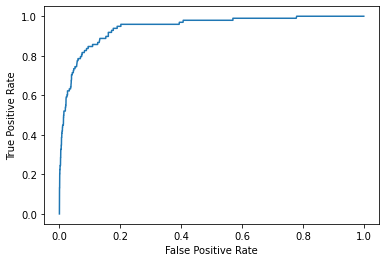

In [45]:
#we’ll calculate the true positive rate and the false positive rate
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Here The more that the curve hugs the top left corner of the plot, 
so random forest the does at classifying the data into categories.**

# Calculate the AUC

In [51]:
metrics.roc_auc_score(y_test, y_pred_proba)

0.9436359403768421

**The AUC for this Random forest model turns out to be 0.94. Since this was closer to one,so
this confirms that the model does a better job of classifying data.**

# calcluating f1-score

In [60]:
F1_Score_forest=metrics.classification_report(y_test,pred_forest)
print(F1_Score_forest)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2893
           1       0.90      0.18      0.31        98

    accuracy                           0.97      2991
   macro avg       0.94      0.59      0.65      2991
weighted avg       0.97      0.97      0.96      2991



**Basically f1-score intrepred a harmonic mean of the precision and recall.so here the F1-score of 0's are close to one(0.99) so we could say 
0's are correctly predicted. but  1's are not correctly predicted as 1's(0.31) because the datasets is imbalance data.**

# XGBoost Classifier Model Building 

In [37]:
#pip install xgboost
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [39]:
y_pred = classifier.predict(x_test)
print(y_pred )

[0 0 0 ... 0 0 0]


# Making the Confusion Matrix for xgboost

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred )
print(cm)
round(accuracy_score(y_test, y_pred),4)

[[2876   17]
 [  73   25]]


0.9699

# Plot the ROC Curve for xgboost

In [53]:
y_pred_proba_xg= classifier.predict_proba(x_test)[::,1]
y_pred_proba_xg

array([0.04171868, 0.06587288, 0.00015096, ..., 0.00208806, 0.02986487,
       0.00075766], dtype=float32)

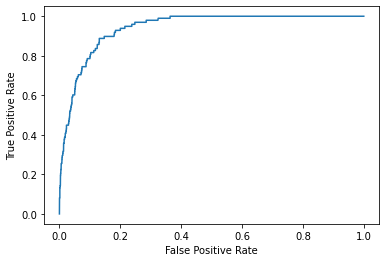

In [54]:
#we’ll calculate the true positive rate and the false positive rate
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_xg)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.plot(FPR_xgb,TPR_xgb)
plt.plot(FPR_RF,TPR_RF)

**Here The more that the curve hugs the top left corner of the plot, 
so XGboost the does at classifying the data into categories.**

# Calculate the AUC

In [59]:
metrics.roc_auc_score(y_test, y_pred_proba_xg)

0.9406043440535565

**The AUC for this xgboost model turns out to be 0.94. Since this was closer to one,s o
this confirms that the model does a better job of classifying data.**

# calculating f1--score 

In [57]:
F1_Score=metrics.classification_report(y_test,y_pred)

In [58]:
print(F1_Score)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2893
           1       0.60      0.26      0.36        98

    accuracy                           0.97      2991
   macro avg       0.79      0.62      0.67      2991
weighted avg       0.96      0.97      0.96      2991



**Here the 0's F1-score of are close to one(0.98) so we could say 
0's are correctly predicted. but  1's are not correctly predicted as 1's(0.36) because the datasets is imbalance data.**

# Conclusion

    Random forest Accuray = 0.972
    XGboost               = 0.969

**Based on the Accuray of the model we can't say Random Forest is the best model for this data.because the data was very bias** 


**Based on the F1--score and ROC we can say XGboost was the best model for this data.**
